In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# for warnings 
import warnings
warnings.filterwarnings('ignore')



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the excel file
df=r"C:\Users\nithi\Desktop\INX-Future-INC---Employee-Performance-Analysis--master\INX-Future-INC---Employee-Performance-Analysis--master\2. Data\1. Raw Data\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"
original_data=pd.read_excel(df)

# 1. Top 3 Important Factors effecting employee performance

In [3]:
# Printing the number of rows and columns using thr "shape()" function
original_data.shape

(1200, 28)

In [4]:
# Displaying the first 4 rows of the dataset using the 'head()' function where 4 is given as a parameter
original_data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = original_data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [6]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

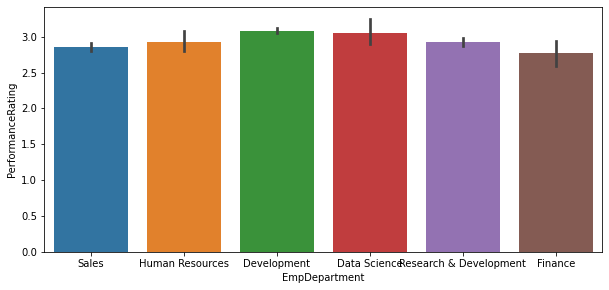

In [7]:
plt.figure(figsize=(10,4.5))
sns.barplot(dept_per['EmpDepartment'],dept_per['PerformanceRating'])

- The development has the best performance compared to others
- The Finance has the lowest performance 

# 2.Department wise performances

In department wise performance,  we have to analyze the data by each department present in the category. The data frame has to be separated or sliced according to department wise. 

In Employee department feature there are six departments available. 
- Sales 
- Human Resoruces 
- Development 
- Data Science 
- Reserch & Devlopment 
-  Finace 

## Sales Department 

In [8]:
sales = original_data[original_data.EmpDepartment == 'Sales'] # Slicing the all coloums of Sales Row 
sales.head(1)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3


###  (i) Performance Rating with respect to number of employees

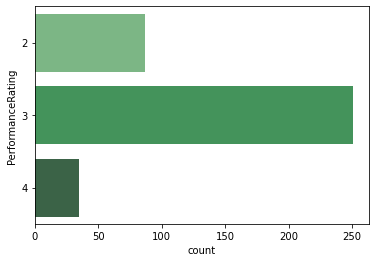

In [9]:
sns.countplot(y="PerformanceRating", data=sales, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

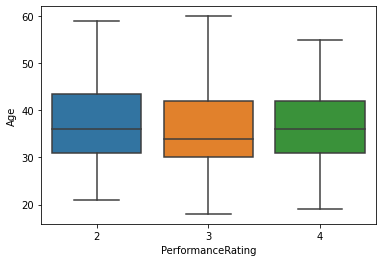

In [10]:
sns.boxplot(sales['PerformanceRating'], sales['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

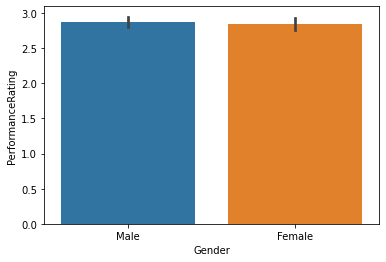

In [11]:
sns.barplot(sales['Gender'], sales['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [12]:
data = [
    {
        'x': sales['TotalWorkExperienceInYears'],
        'y': sales['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':sales['ExperienceYearsAtThisCompany'],
        'y':sales['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': sales['ExperienceYearsInCurrentRole'],
        'y': sales['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Sales',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Human Resoruces Department 

In [13]:
HR = original_data[original_data.EmpDepartment == 'Human Resources'] # Slicing the all coloums of Sales Row 
HR.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3


###  (i) Performance Rating with respect to number of employees

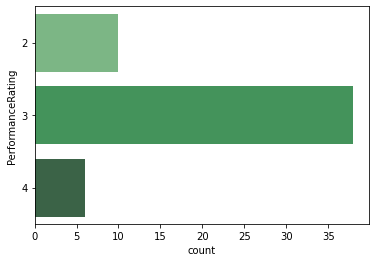

In [14]:
sns.countplot(y="PerformanceRating", data=HR, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

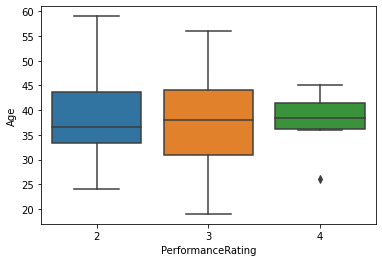

In [15]:
sns.boxplot(HR['PerformanceRating'], HR['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

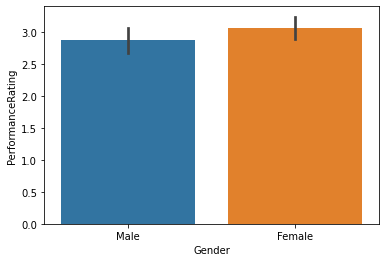

In [16]:
sns.barplot(HR['Gender'], HR['PerformanceRating'])


### (iv) Performance According to the Experience Level

In [17]:
data = [
    {
        'x': HR['TotalWorkExperienceInYears'],
        'y': HR['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':HR['ExperienceYearsAtThisCompany'],
        'y':HR['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': HR['ExperienceYearsInCurrentRole'],
        'y': HR['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - HR ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Development Department 

In [18]:
Development = original_data[original_data.EmpDepartment == 'Development'] # Slicing the all coloums of Sales Row 
Development.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3


###  (i) Performance Rating with respect to number of employees

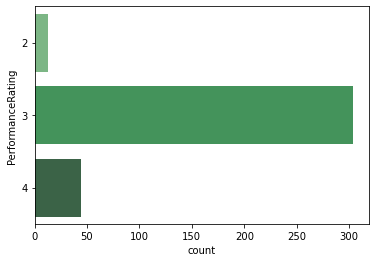

In [19]:
sns.countplot(y="PerformanceRating", data=Development, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

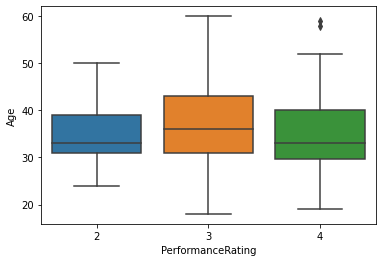

In [20]:
sns.boxplot(Development['PerformanceRating'], Development['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

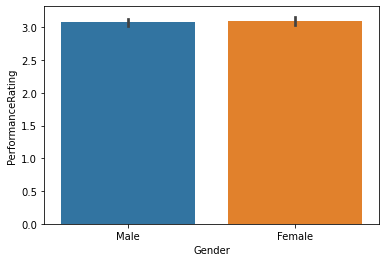

In [21]:
sns.barplot(Development['Gender'], Development['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [22]:
data = [
    {
        'x': Development['TotalWorkExperienceInYears'],
        'y': Development['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Development['ExperienceYearsAtThisCompany'],
        'y':Development['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Development['ExperienceYearsInCurrentRole'],
        'y': Development['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Development ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Data Science Department 

In [23]:
Data_Science = original_data[original_data.EmpDepartment == 'Data Science'] # Slicing the all coloums of Sales Row 
Data_Science.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3


###  (i) Performance Rating with respect to number of employees

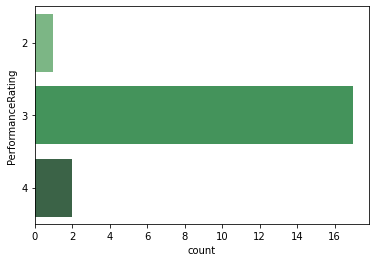

In [24]:
sns.countplot(y="PerformanceRating", data=Data_Science, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

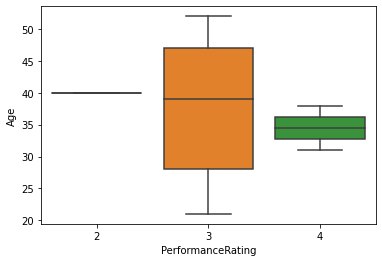

In [25]:
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

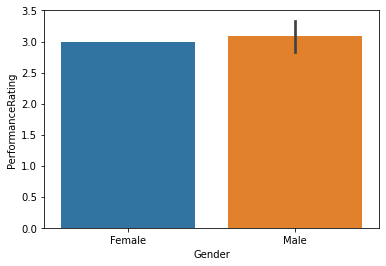

In [26]:
sns.barplot(Data_Science['Gender'], Data_Science['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [27]:
data = [
    {
        'x': Data_Science['TotalWorkExperienceInYears'],
        'y': Data_Science['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Data_Science['ExperienceYearsAtThisCompany'],
        'y':Data_Science['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Data_Science['ExperienceYearsInCurrentRole'],
        'y': Data_Science['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Data Science ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Research & Development Department 

In [28]:
RD = original_data[original_data.EmpDepartment == 'Research & Development'] # Slicing the all coloums of Sales Row 
RD.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3
158,E1001289,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,...,3,4,1,3,4,3,0,3,No,3


###  (i) Performance Rating with respect to number of employees

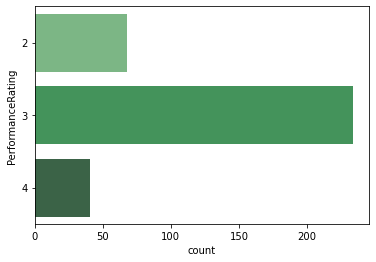

In [29]:
sns.countplot(y="PerformanceRating", data=RD, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

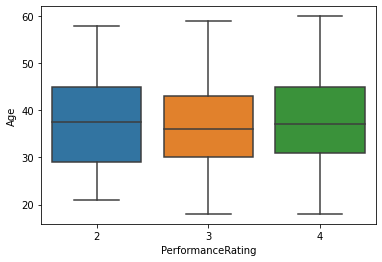

In [30]:
sns.boxplot(RD['PerformanceRating'], RD['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

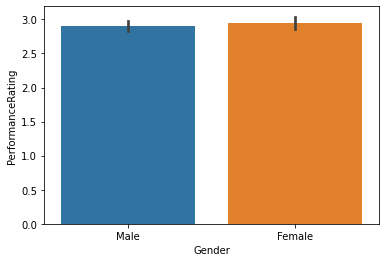

In [31]:
sns.barplot(RD['Gender'], RD['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [32]:
data = [
    {
        'x': RD['TotalWorkExperienceInYears'],
        'y': RD['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':RD['ExperienceYearsAtThisCompany'],
        'y':RD['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': RD['ExperienceYearsInCurrentRole'],
        'y': RD['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - R & D',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# Finance Department

In [33]:
Finance = original_data[original_data.EmpDepartment == 'Finance'] # Slicing the all coloums of Sales Row 
Finance.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3
485,E1001874,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,...,4,10,3,2,10,9,6,8,No,2


###  (i) Performance Rating with respect to number of employees

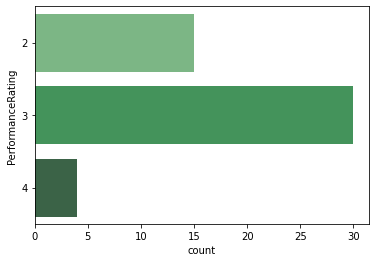

In [34]:
sns.countplot(y="PerformanceRating", data=Finance, palette="Greens_d");

###  (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

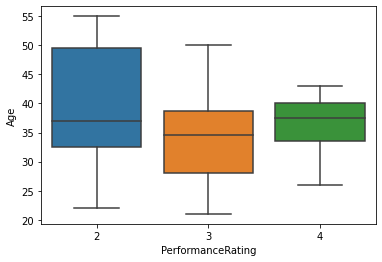

In [35]:
sns.boxplot(Finance['PerformanceRating'], Finance['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

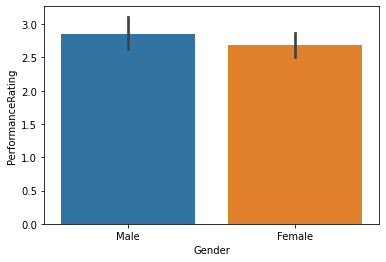

In [36]:
sns.barplot(Finance['Gender'], Finance['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [37]:
data = [
    {
        'x': Finance['TotalWorkExperienceInYears'],
        'y': Finance['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Finance['ExperienceYearsAtThisCompany'],
        'y':Finance['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Finance['ExperienceYearsInCurrentRole'],
        'y': Finance['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Finance ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)